Automatically created module for IPython interactive environment


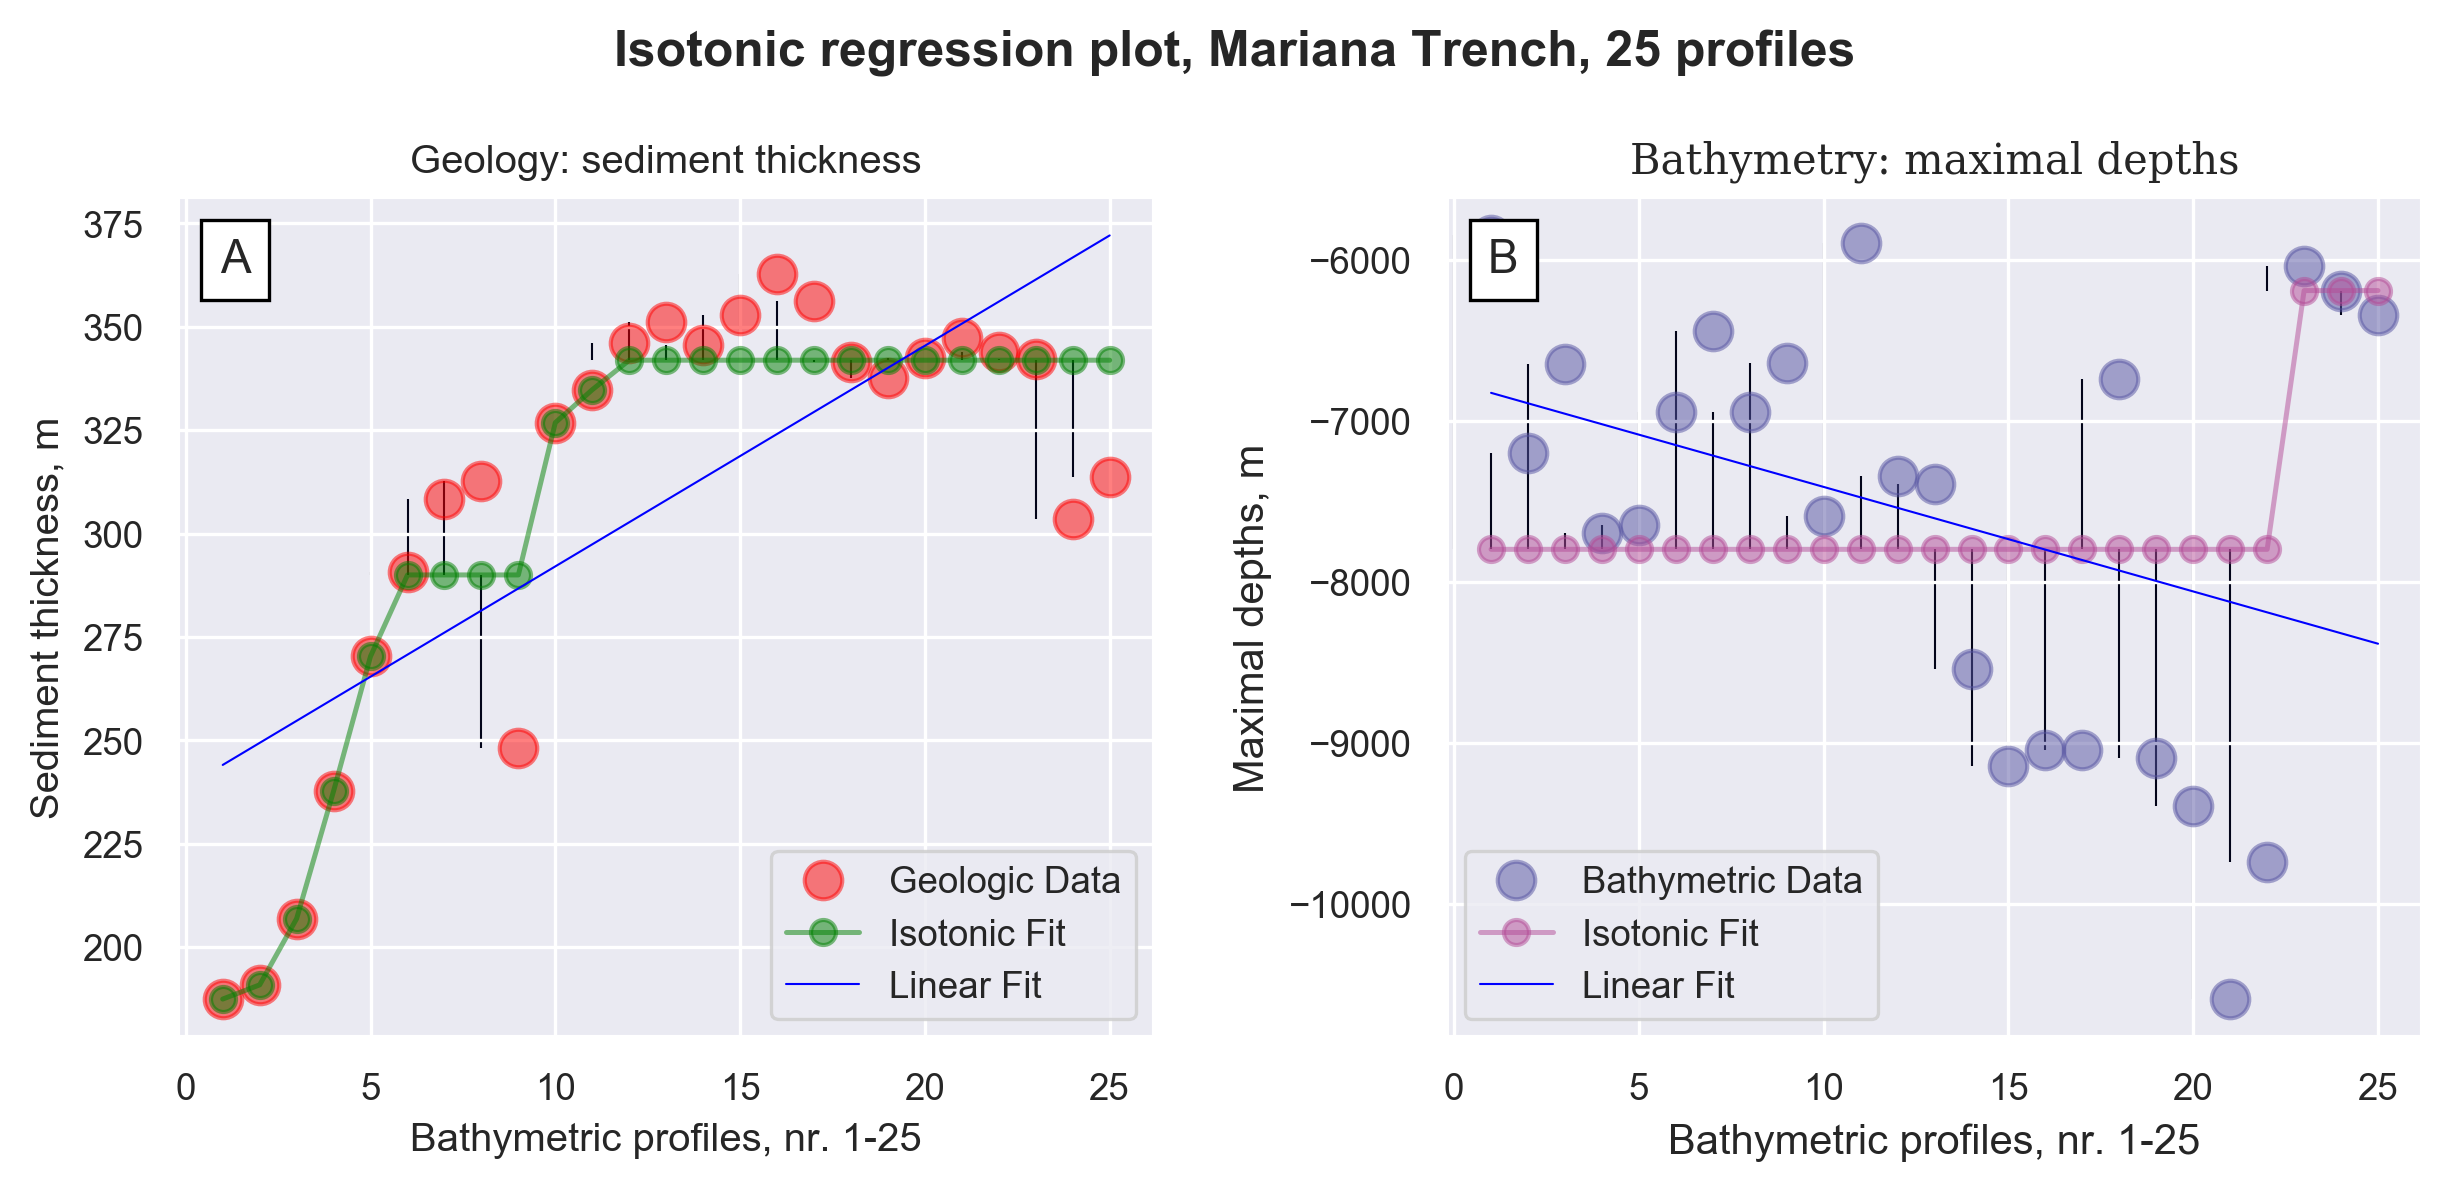

In [43]:
print(__doc__)
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.artist as martist
from matplotlib.offsetbox import AnchoredText
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

sns.set_style('darkgrid')
sns.set_context("paper")

os.chdir('/Users/pauline/Documents/Python')
df = pd.read_csv("Tab-Morph.csv")

n = 25
x = df.profile # x is the same for both subplots 1 and 2 
rs = check_random_state(0)
y1 = df.sedim_thick + 80. * np.log1p(x) # y for subplot 1
y2 = df.Min + 3. * np.log1p(x) # y for subplot 2

# Fit IsotonicRegression and LinearRegression model for subplot 1
ir1 = IsotonicRegression()
y1_ = ir1.fit_transform(x, y1)
lr1 = LinearRegression()
lr1.fit(x[:, np.newaxis], y1)  # x needs to be 2d for LinearRegression

# Fit IsotonicRegression and LinearRegression model for subplot 2
ir2 = IsotonicRegression()
y2_ = ir2.fit_transform(x, y2)
lr2 = LinearRegression()
lr2.fit(x[:, np.newaxis], y2)  # x needs to be 2d for LinearRegression

# Parameters for subplot 1 
segments1 = [[[i, y1[i]], [i, y1_[i]]] for i in range(n)]
lc1 = LineCollection(segments1, zorder=0)
lc1.set_array(np.ones(len(y1)))
lc1.set_linewidths(np.full(n, 0.5))
# Parameters for subplot 2 
segments2 = [[[i, y2[i]], [i, y2_[i]]] for i in range(n)]
lc2 = LineCollection(segments2, zorder=0)
lc2.set_array(np.ones(len(y2)))
lc2.set_linewidths(np.full(n, 0.5))
    
# Plotting
fig = plt.figure(figsize=(8.8, 4.0), dpi=300)
fig.suptitle('Isotonic regression plot, Mariana Trench, 25 profiles', 
             fontweight='bold', fontsize=12, x=0.5, y=0.99)

def add_at(ax, t, loc=2):
    fp = dict(size=11)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

# subplot 1 
ax = fig.add_subplot(121)
plt.plot(x, y1, 'r.', markersize=18, alpha=.5)
plt.plot(x, y1_, 'g.-', markersize=12, alpha=.5)
plt.plot(x, lr1.predict(x[:, np.newaxis]), 'b-', linewidth=.5)
plt.gca().add_collection(lc1)
plt.legend(('Geologic Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Geology: sediment thickness')
plt.xlabel('Bathymetric profiles, nr. 1-25', fontfamily='sans-serif')
plt.ylabel('Sediment thickness, m', fontfamily='sans-serif')
add_at(ax, "A")

# subplot 2
ax = fig.add_subplot(122)
plt.plot(x, y2, '.', c = '#5654a2', markersize=18, alpha=.5)
plt.plot(x, y2_, '.-', c = '#b44c97', markersize=12, alpha=.5)
plt.plot(x, lr2.predict(x[:, np.newaxis]), 'b-', linewidth=.5)
plt.gca().add_collection(lc2)
plt.legend(('Bathymetric Data', 'Isotonic Fit', 'Linear Fit'), loc='lower left')
plt.title('Bathymetry: maximal depths', fontsize=10, fontfamily='serif')
plt.xlabel('Bathymetric profiles, nr. 1-25', fontsize=10, fontfamily='sans-serif')
plt.ylabel('Maximal depths, m', fontsize=10, fontfamily='sans-serif')
add_at(ax, "B")

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15,
                    left=0.10, right=0.95,
                    hspace=0.3, wspace=0.3
                    )
fig.savefig('plot_Iso.png', dpi=300)